In [1]:
import pandas as pd
import pyBigWig
import actc_seq
import tqdm
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from collections import Counter
from pylab import rcParams
from itertools import product


# import ATACseq overlap dataset

In [2]:
atac_out = '/Users/fzheng/Library/CloudStorage/GoogleDrive-fzheng@broadinstitute.org/Shared drives/GPP Cloud /R&D/People/Fengyi/rule_set/crispri/data/2024/ATAC/'
chrtest_StomachFemale = pd.read_csv(atac_out + 'ATAC_StomachFemale.csv')
chrtest_StomachFemale = chrtest_StomachFemale[abs(chrtest_StomachFemale['sgRNA \'Cut\' Site TSS Offset']) <= 5000]
ess_noness = pd.read_csv('/Users/fzheng/Library/CloudStorage/GoogleDrive-fzheng@broadinstitute.org/Shared drives/GPP Cloud /R&D/People/Fengyi/rule_set/crispri/data/2022/essential_nonessential/essentials_nonessentials_CRISPRi_tiling_designs_v2.csv')
EssGene = ess_noness[ess_noness.Category == 'Essential']['Target Gene Symbol'].unique()


In [3]:
# make a dict of possible datasaets
DataSet = chrtest_StomachFemale.DataSet.unique()
Domain = chrtest_StomachFemale.Domain.unique()
Cellline = chrtest_StomachFemale.condition.unique()
DatasetCombo = list(product(DataSet,Domain,Cellline))
def DatasetDictFunction(ATACdf):
    # takes in ATACseq DatasetCombo, i assign 
    # for each unique comb in a key and dataset subset using the unique value is the value
    # return a dic
    DatasetDict = dict()
    for combo in DatasetCombo:
        subset_data = ATACdf[(ATACdf.DataSet == combo[0]) 
                     & (ATACdf.Domain == combo[1]) 
                     & (ATACdf.condition == combo[2])]
        if len(subset_data) == 0:
            pass
        else:
            if combo[0] == 'InHouse':
                subset_data_ess = subset_data[subset_data['Target Gene Symbol'].isin(EssGene)]
                DatasetDict[combo] = subset_data_ess

            else:
                DatasetDict[combo] = subset_data
    return DatasetDict

In [4]:
DatasetDictStomachFemale = DatasetDictFunction(chrtest_StomachFemale)

In [5]:
DatasetDictStomachFemale

{('Nunze',
  'Kox1',
  'K562'):        Target Gene Symbol chromosome        sgRNA Sequence  \
 0                  CHMP2A      chr19  GCGACAGAAACTAGAGACCC   
 1                  CHMP2A      chr19  GAACCGTGCCATGCGGGAGC   
 2                  CHMP2A      chr19  GGCCCTGAACCGTGCCATGC   
 3                  CHMP2A      chr19  GGGCCCTGAACCGTGCCATG   
 4                  CHMP2A      chr19  GGCTACTGCGGCAGAACCAG   
 ...                   ...        ...                   ...   
 406234              SSRP1      chr11  Gtctcagtgcgttggcaaca   
 406235              SSRP1      chr11  GCAGCTTGCTAAATCAATCC   
 406236              SSRP1      chr11  GAGCTTGCTAAATCAATCCT   
 406237              SSRP1      chr11  GGCTTGCTAAATCAATCCTG   
 406238              SSRP1      chr11  GTCCTGGGGTAAGAGACAAC   
 
                 sgRNA Context Sequence  sgRNA 'Cut' Position Strand of Target  \
 0       GCGAGCGACAGAAACTAGAGACCCAGGAGA            58554101.0                -   
 1       CCCTGAACCGTGCCATGCGGGAGCTGGACC        

# ATAC Stomach Female

### Pval_ATAC_InHouseA549Kox1

MROH6: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10


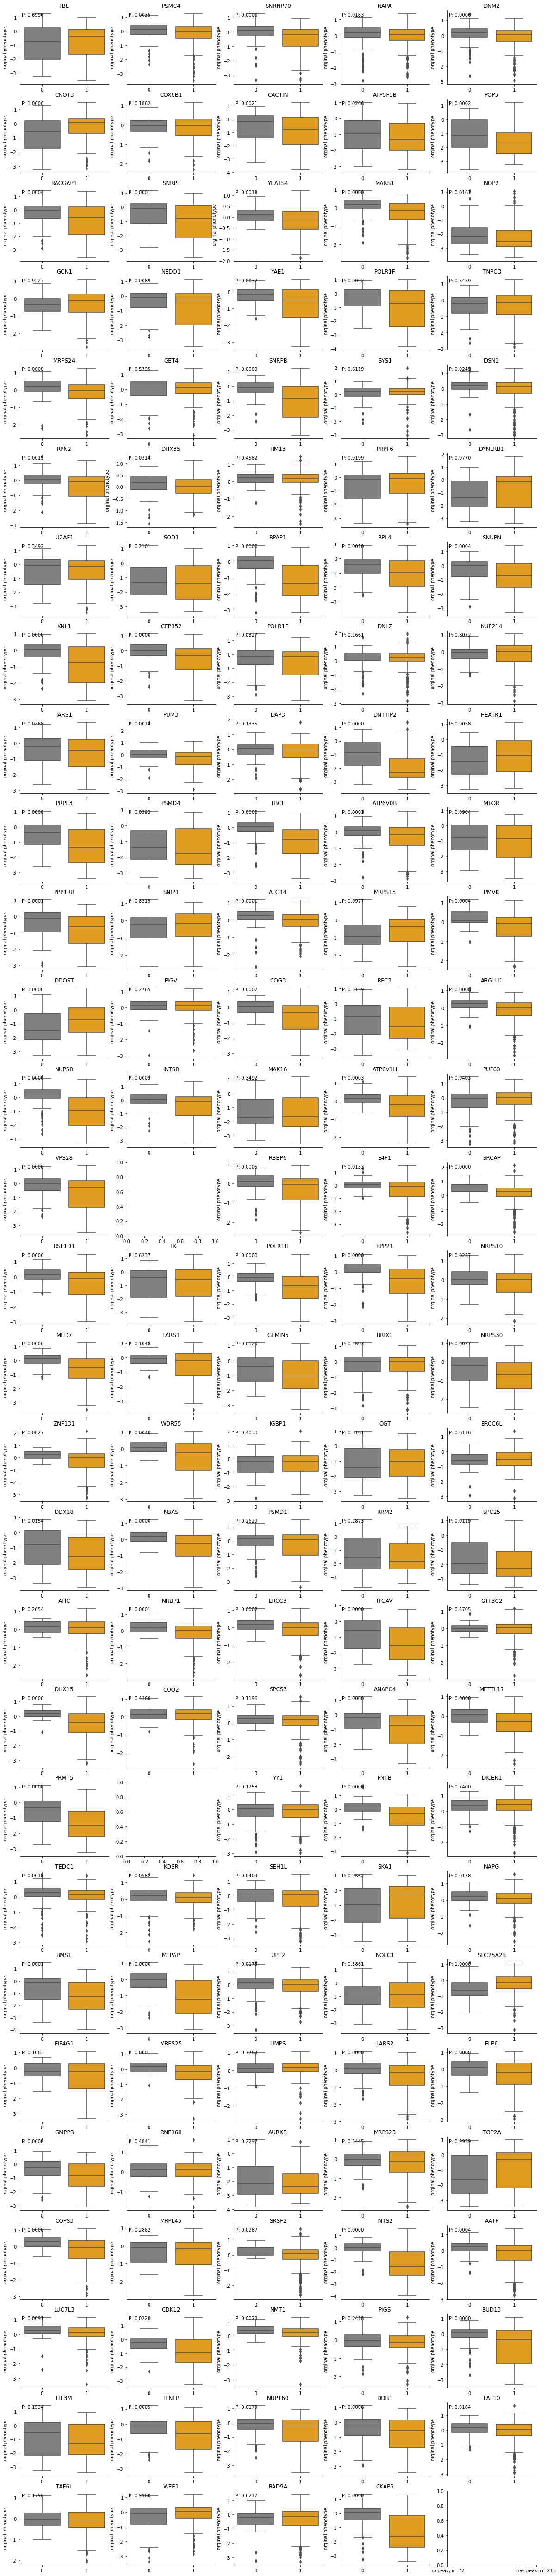

In [6]:
Pval_ATACStomachFemale_InHouseA549Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictStomachFemale[('InHouse', 'Kox1', 'A549')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


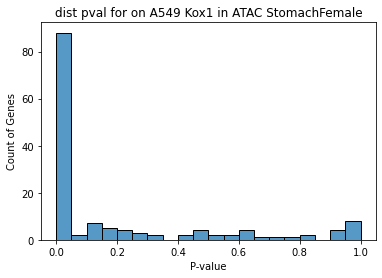

In [7]:
Pval_ATACStomachFemale_InHouseA549Kox1_df = pd.DataFrame(Pval_ATACStomachFemale_InHouseA549Kox1.items())
Pval_ATACStomachFemale_InHouseA549Kox1_df['cell'] = 'InHouseA549Kox1'
actc_seq.pval_agg(Pval_ATACStomachFemale_InHouseA549Kox1_df[1], 'dist pval for on A549 Kox1 in ATAC StomachFemale')

### ATAC_InHouseA549Zim3

MROH6: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10


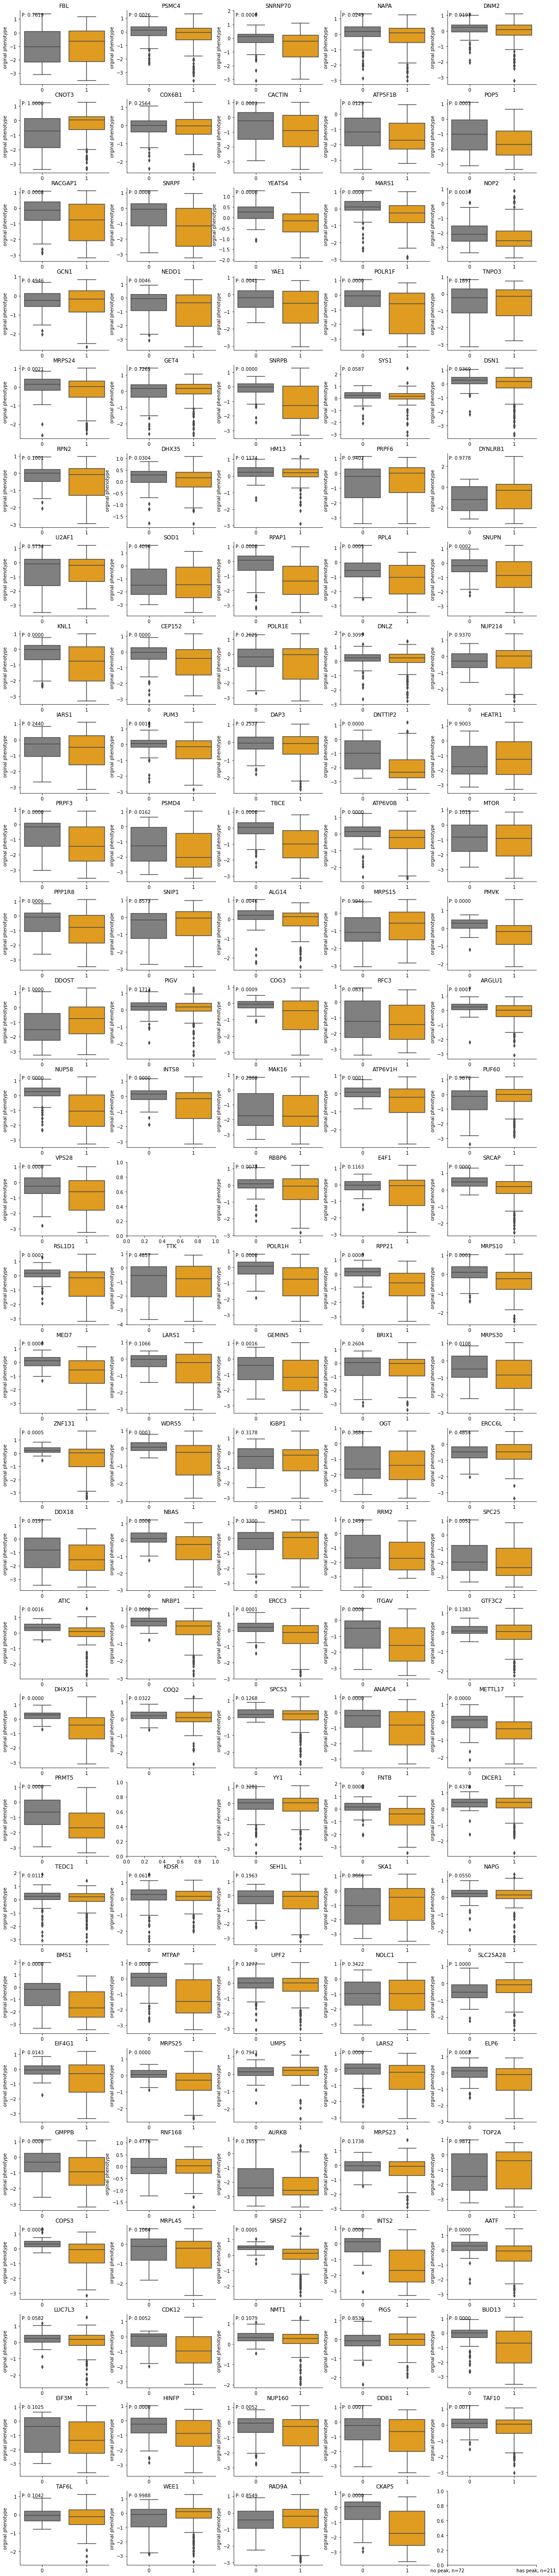

In [8]:
Pval_ATACStomachFemale_InHouseA549Zim3= actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictStomachFemale[('InHouse', 'Zim3', 'A549')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


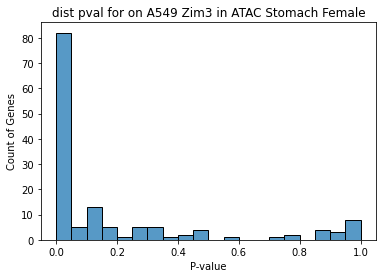

In [9]:
Pval_ATACStomachFemale_InHouseA549Zim3_df = pd.DataFrame(Pval_ATACStomachFemale_InHouseA549Zim3.items())
Pval_ATACStomachFemale_InHouseA549Zim3_df['cell'] = 'InHouseA549Zim3'
actc_seq.pval_agg(Pval_ATACStomachFemale_InHouseA549Zim3_df[1], 'dist pval for on A549 Zim3 in ATAC Stomach Female')

### InHouseHCT116Zim3

MROH6: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10


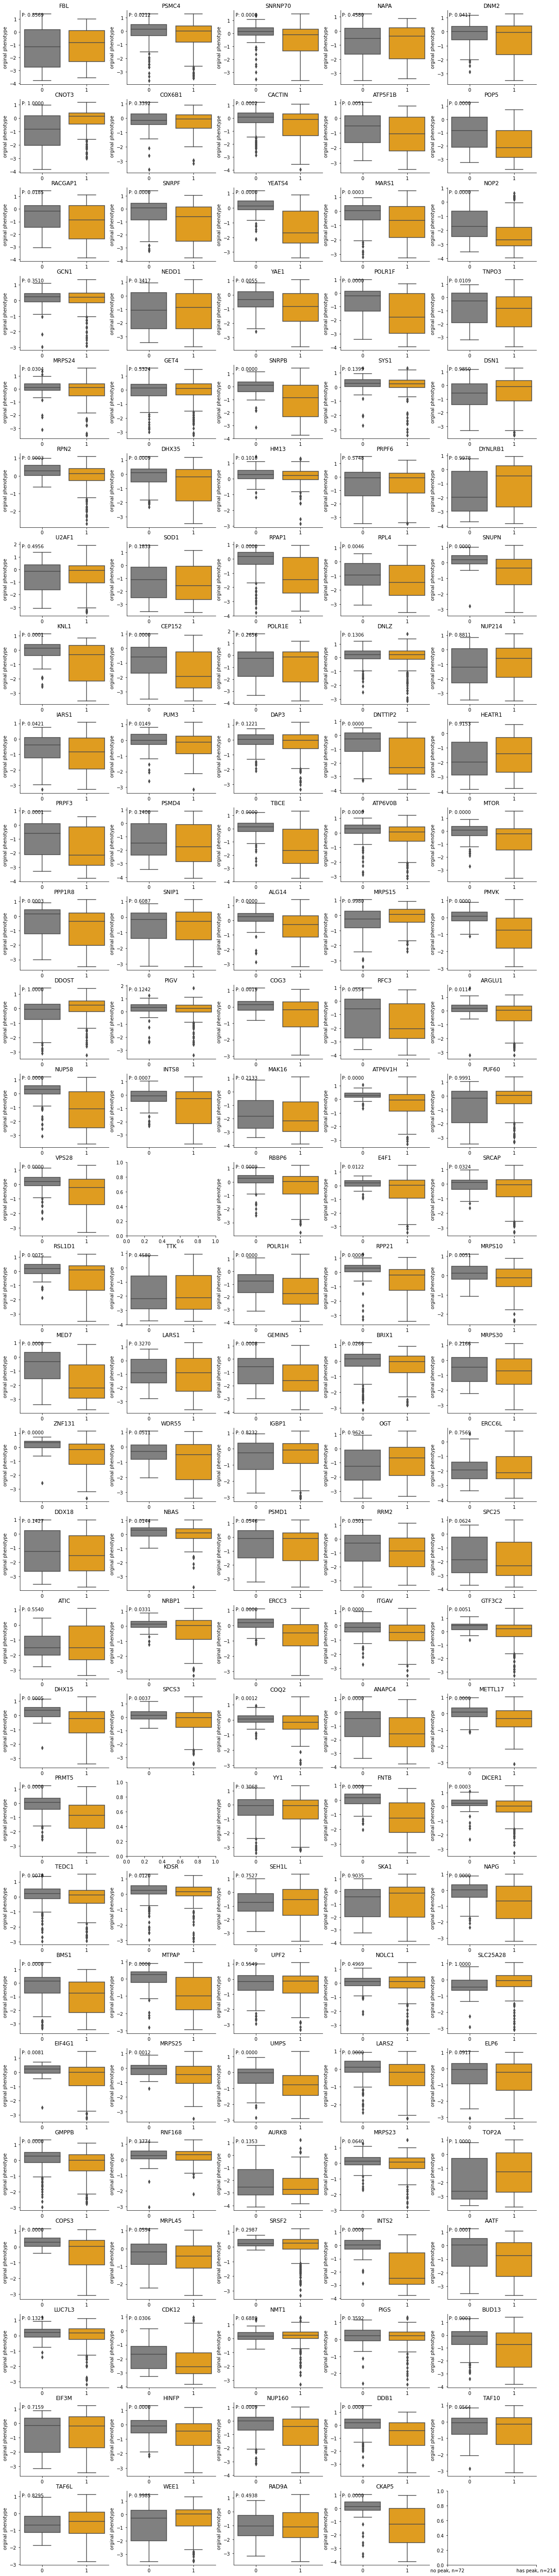

In [10]:
Pval_ATACStomachFemale_InHouseHCT116Zim3= actc_seq.pvalue_overlap_comparison_boxplot(
    DatasetDictStomachFemale[('InHouse', 'Zim3', 'HCT116')], 
    'orginal phenotype', 
    gene_col = 'Target Gene Symbol', 
    test_direction = 'no peak > peak' )


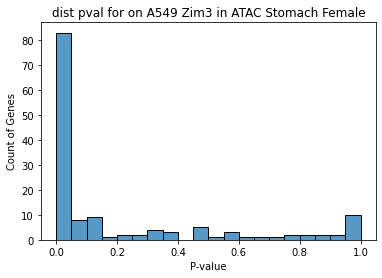

In [11]:
Pval_ATACStomachFemale_InHouseHCT116Zim3_df = pd.DataFrame(Pval_ATACStomachFemale_InHouseHCT116Zim3.items())
Pval_ATACStomachFemale_InHouseHCT116Zim3_df['cell'] = 'InHouseHCT116Zim3'
actc_seq.pval_agg(Pval_ATACStomachFemale_InHouseHCT116Zim3_df[1], 'dist pval for on A549 Zim3 in ATAC Stomach Female')

### InHouseHCT116Kox1

MROH6: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10


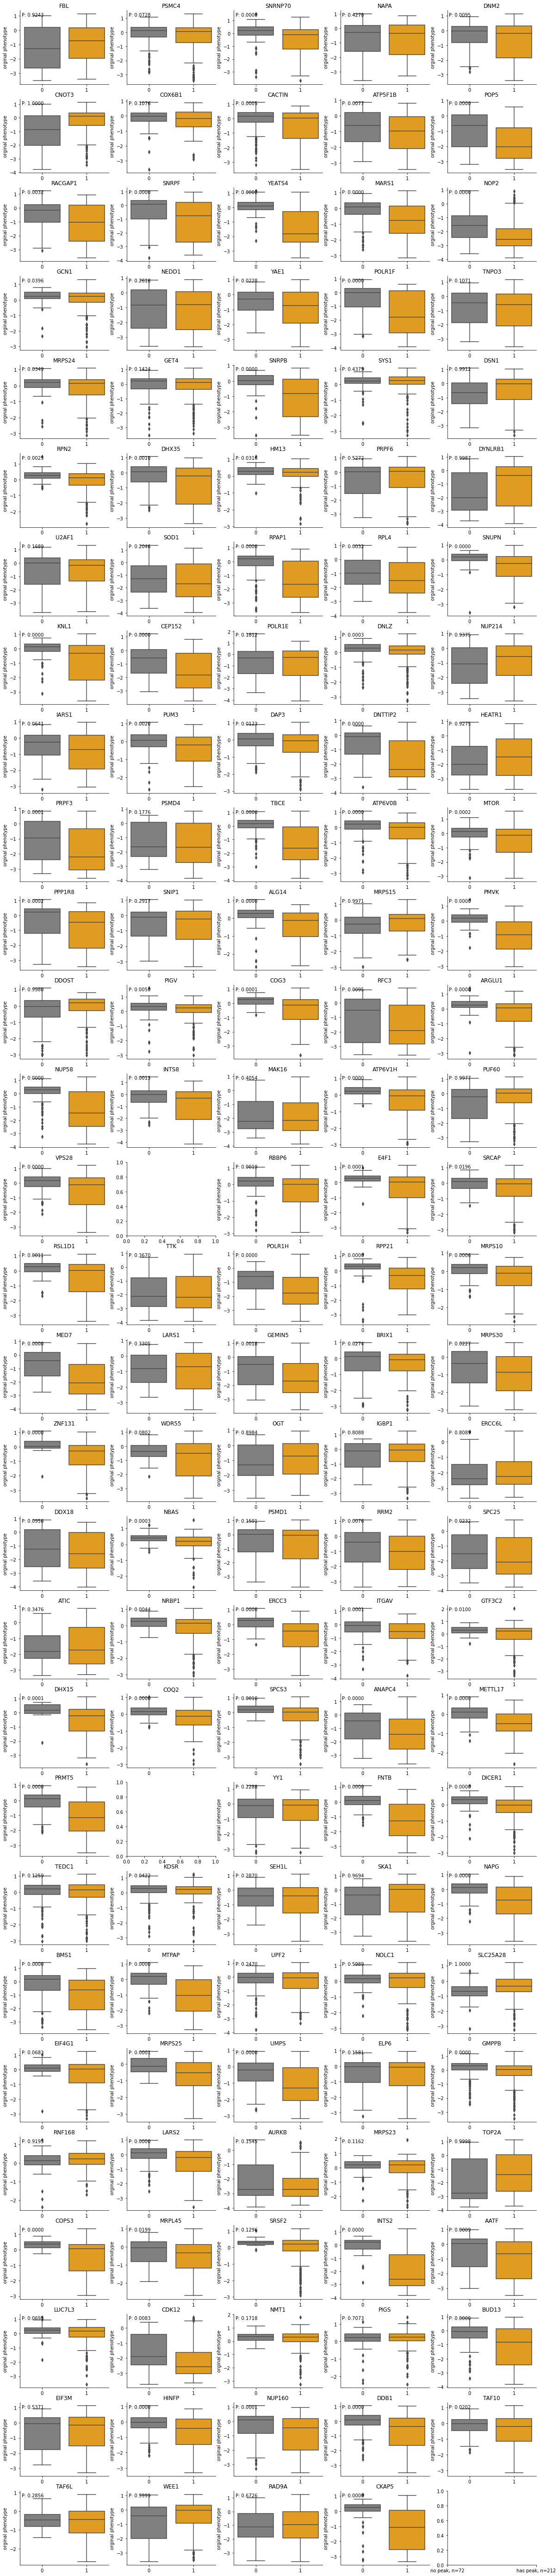

In [12]:
Pval_ATACStomachFemale_InHouseHCT116Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictStomachFemale[('InHouse', 'Kox1', 'HCT116')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


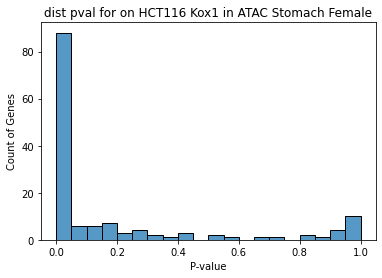

In [13]:
Pval_ATACStomachFemale_InHouseHCT116Kox1_df = pd.DataFrame(Pval_ATACStomachFemale_InHouseHCT116Kox1.items())
Pval_ATACStomachFemale_InHouseHCT116Kox1_df['cell'] = 'InHouseHCT116Kox1'
actc_seq.pval_agg(Pval_ATACStomachFemale_InHouseHCT116Kox1_df[1], 'dist pval for on HCT116 Kox1 in ATAC Stomach Female')

### NunezK562Kox1

NIP7: Sample size in overlap or nonoverlap < 10
MRPL35: Sample size in overlap or nonoverlap < 10
SNW1: Sample size in overlap or nonoverlap < 10


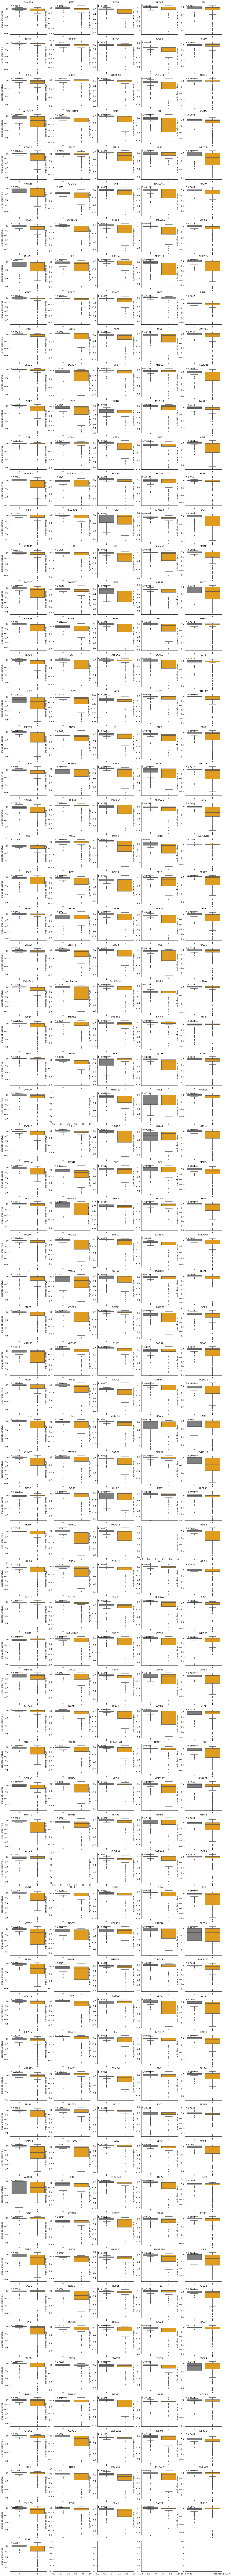

In [14]:
Pval_ATACStomachFemale_NunezK562Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictStomachFemale[('Nunze', 'Kox1', 'K562')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


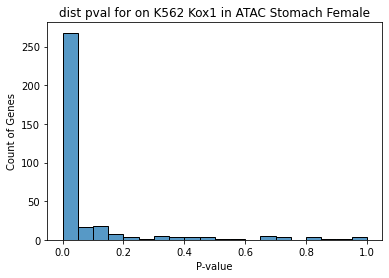

In [15]:
Pval_ATACStomachFemale_NunezK562Kox1_df = pd.DataFrame(Pval_ATACStomachFemale_NunezK562Kox1.items())
Pval_ATACStomachFemale_NunezK562Kox1_df['cell'] = 'NunezK562Kox1'
actc_seq.pval_agg(Pval_ATACStomachFemale_NunezK562Kox1_df[1], 'dist pval for on K562 Kox1 in ATAC Stomach Female')

### GilbertK562Kox1

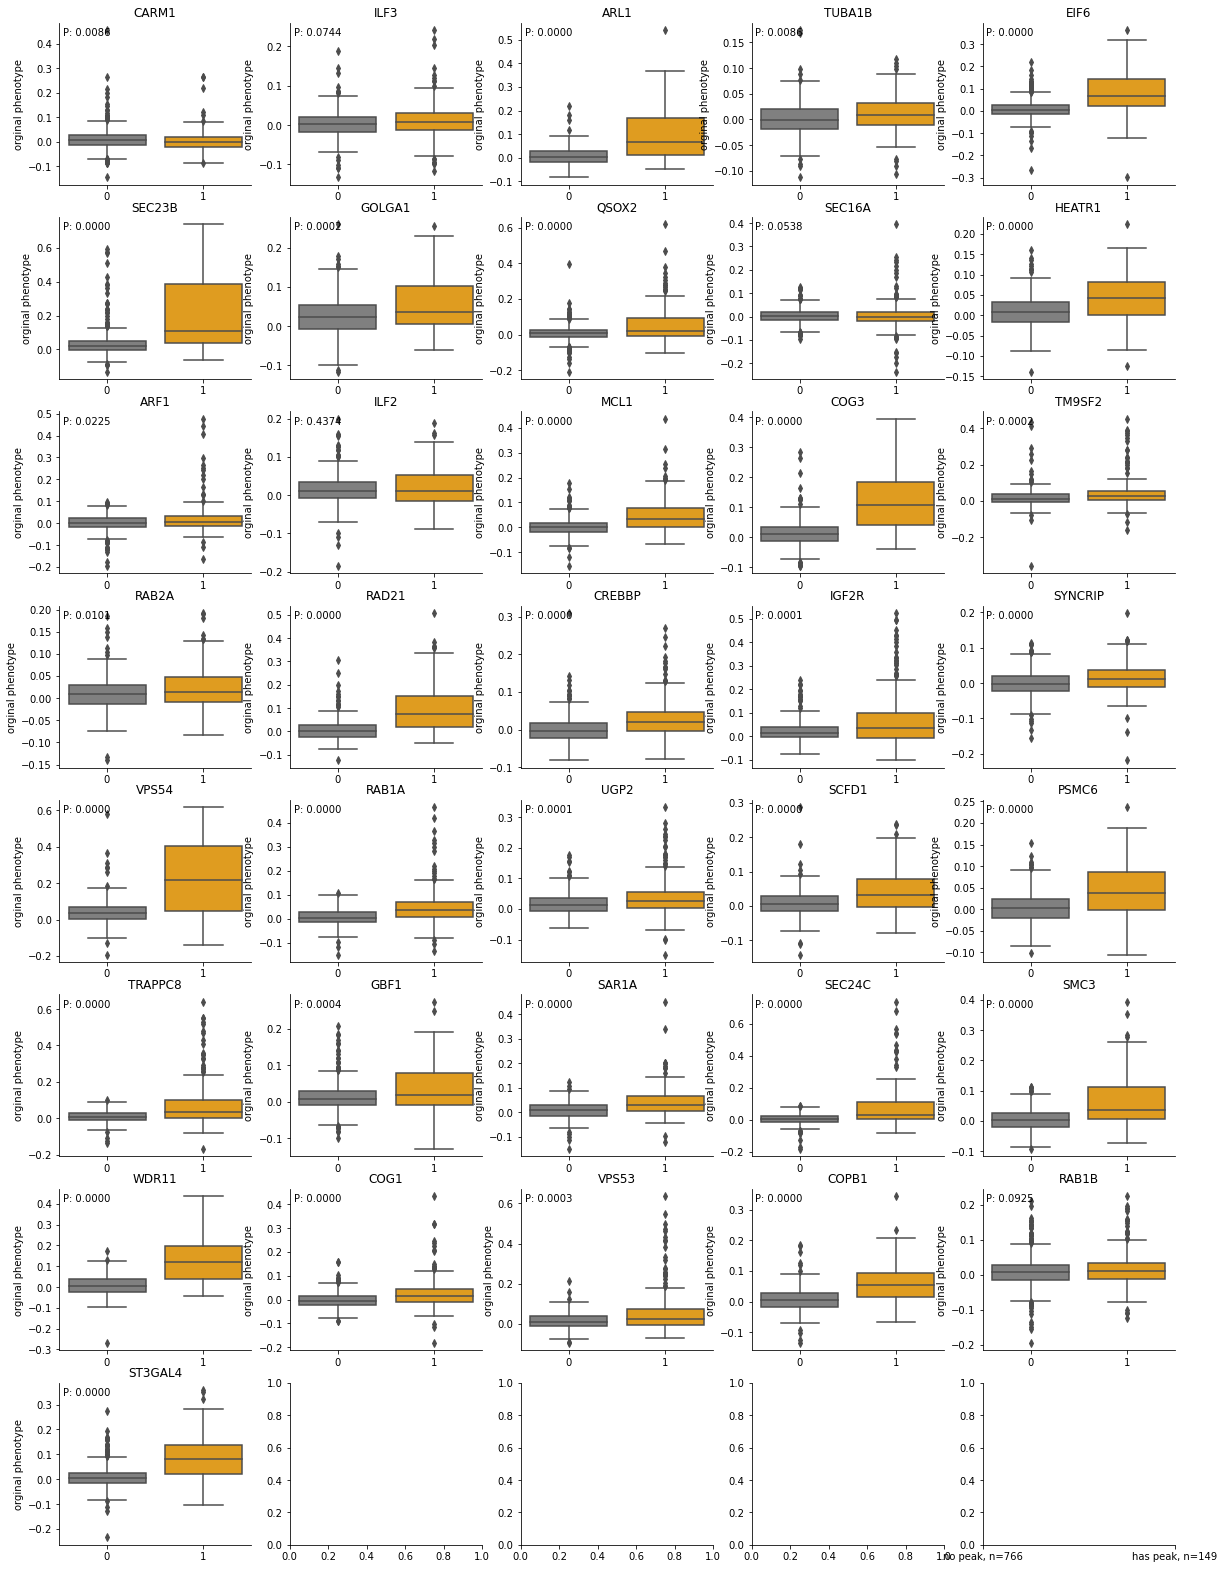

In [16]:
Pval_ATACStomachFemale_GilbertK562Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictStomachFemale[('Gilbert', 'Kox1', 'K562')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'two-sided' )


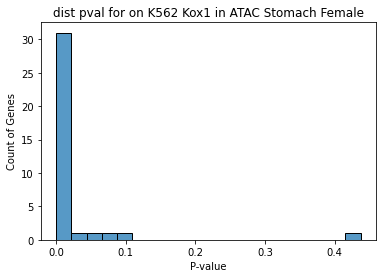

In [17]:
Pval_ATACStomachFemale_GilbertK562Kox1_df = pd.DataFrame(Pval_ATACStomachFemale_GilbertK562Kox1.items())
Pval_ATACStomachFemale_GilbertK562Kox1_df['cell'] = 'GilbertK562Kox1'
actc_seq.pval_agg(Pval_ATACStomachFemale_GilbertK562Kox1_df[1], 'dist pval for on K562 Kox1 in ATAC Stomach Female')

In [18]:
total_pval = pd.concat([Pval_ATACStomachFemale_InHouseA549Kox1_df,
           Pval_ATACStomachFemale_InHouseHCT116Kox1_df,
           Pval_ATACStomachFemale_InHouseHCT116Zim3_df,
           Pval_ATACStomachFemale_InHouseA549Zim3_df,
           Pval_ATACStomachFemale_GilbertK562Kox1_df,
           Pval_ATACStomachFemale_NunezK562Kox1_df])

total_pval.columns = ['Gene', 'Pval', 'DataSetID']
out_path = '/Users/fzheng/Library/CloudStorage/GoogleDrive-fzheng@broadinstitute.org/Shared drives/GPP Cloud /R&D/People/Fengyi/rule_set/crispri/data/2024/ATAC/Pval/'
total_pval.to_csv(out_path+'StomachFemalePval_v2.csv', index = False)